In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_mistralai import ChatMistralAI
from dotenv import load_dotenv
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver

In [4]:
load_dotenv()

True

In [5]:
llm = ChatMistralAI()

In [6]:
class JokeState(TypedDict):

    topic:str
    joke:str
    explanation:str

In [8]:
def generate_joke(state:JokeState):

    topic = state['topic']

    prompt = f"generate a funny joke ont he topic : {topic}"

    result = llm.invoke(prompt).content

    return{'joke':result}

def explain_joke(state : JokeState):

    joke = state['joke']
    topic = state['topic']

    prompt = f" expalin this joke : {joke} on the topic : {topic}"

    result = llm.invoke(prompt).content

    return{'explanation':result}

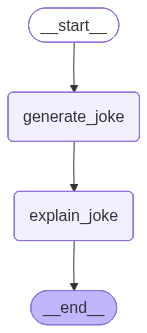

In [10]:
graph = StateGraph(JokeState)

#node
graph.add_node("generate_joke",generate_joke)
graph.add_node("explain_joke",explain_joke)

#edge
graph.add_edge(START,"generate_joke")
graph.add_edge("generate_joke","explain_joke")
graph.add_edge("explain_joke",END)

checkpointer = InMemorySaver()

chatbot = graph.compile(checkpointer=checkpointer)
chatbot

In [12]:
config1 = {'configurable':{'thread_id':"1"}}

chatbot.invoke({'topic':'pizza'},config=config1)

{'topic': 'pizza',
 'joke': 'Sure! Here\'s a pizza-themed joke for you:\n\n**Why did the pizza go to therapy?**\nBecause it had too many *toppings* to deal with!\n\n(Alternatively, if you prefer a punny one-liner: *"I told my pizza I loved it… but it just said, \'Cheese it, I’m not that kind of pie!\'"*)\n\nHope that gives you a slice of laughter! 🍕😆',
 'explanation': 'This joke is a playful pun that combines two meanings of the word *"toppings"* to create humor. Here’s the breakdown:\n\n1. **Literal Meaning**: In the context of pizza, "toppings" refers to the ingredients added to a pizza (like cheese, pepperoni, mushrooms, etc.).\n2. **Psychological Meaning**: In therapy, "toppings" is a pun on the word *"topics"*—the issues or problems a person brings to therapy to discuss.\n\nThe joke suggests that the pizza is overwhelmed by its many "toppings" (ingredients), but the humor comes from imagining the pizza as a person with too many emotional or psychological "topics" to handle. It’s a

In [13]:
chatbot.get_state(config=config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Sure! Here\'s a pizza-themed joke for you:\n\n**Why did the pizza go to therapy?**\nBecause it had too many *toppings* to deal with!\n\n(Alternatively, if you prefer a punny one-liner: *"I told my pizza I loved it… but it just said, \'Cheese it, I’m not that kind of pie!\'"*)\n\nHope that gives you a slice of laughter! 🍕😆', 'explanation': 'This joke is a playful pun that combines two meanings of the word *"toppings"* to create humor. Here’s the breakdown:\n\n1. **Literal Meaning**: In the context of pizza, "toppings" refers to the ingredients added to a pizza (like cheese, pepperoni, mushrooms, etc.).\n2. **Psychological Meaning**: In therapy, "toppings" is a pun on the word *"topics"*—the issues or problems a person brings to therapy to discuss.\n\nThe joke suggests that the pizza is overwhelmed by its many "toppings" (ingredients), but the humor comes from imagining the pizza as a person with too many emotional or psychological "topics

In [16]:
list(chatbot.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Sure! Here\'s a pizza-themed joke for you:\n\n**Why did the pizza go to therapy?**\nBecause it had too many *toppings* to deal with!\n\n(Alternatively, if you prefer a punny one-liner: *"I told my pizza I loved it… but it just said, \'Cheese it, I’m not that kind of pie!\'"*)\n\nHope that gives you a slice of laughter! 🍕😆', 'explanation': 'This joke is a playful pun that combines two meanings of the word *"toppings"* to create humor. Here’s the breakdown:\n\n1. **Literal Meaning**: In the context of pizza, "toppings" refers to the ingredients added to a pizza (like cheese, pepperoni, mushrooms, etc.).\n2. **Psychological Meaning**: In therapy, "toppings" is a pun on the word *"topics"*—the issues or problems a person brings to therapy to discuss.\n\nThe joke suggests that the pizza is overwhelmed by its many "toppings" (ingredients), but the humor comes from imagining the pizza as a person with too many emotional or psychological "topic

## Time Travel

In [17]:
chatbot.get_state({'configurable':{'thread_id':"1",'checkpoint_id': '1f0dc925-55fc-628e-bfff-0db8ae58883a'}})

StateSnapshot(values={}, next=('__start__',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0dc925-55fc-628e-bfff-0db8ae58883a'}}, metadata={'source': 'input', 'step': -1, 'parents': {}}, created_at='2025-12-19T04:22:30.416039+00:00', parent_config=None, tasks=(PregelTask(id='1059d537-5847-c98a-13e2-66cd2ef0308a', name='__start__', path=('__pregel_pull', '__start__'), error=None, interrupts=(), state=None, result={'topic': 'pizza'}),), interrupts=())

In [19]:
chatbot.invoke(None,config={'configurable':{'thread_id':"1",'checkpoint_id': '1f0dc925-55fc-628e-bfff-0db8ae58883a'}})

{'topic': 'pizza',
 'joke': "Sure! Here's a pizza-themed joke for you:\n\n**Why did the pizza break up with the garlic bread?**\n*Because it couldn’t handle the* ***cheesy drama*** *anymore!*\n\n🍕😂\n\nWant another one? Just say the word!",
 'explanation': 'This pizza-themed joke plays on the idea of a breakup between two food items—pizza and garlic bread—using human-like emotions and drama. Here’s the breakdown:\n\n1. **Setup**: The joke sets up a relationship between pizza and garlic bread, treating them like a couple.\n2. **Punchline**: The breakup reason is *"cheesy drama"*, which has a double meaning:\n   - **Literal**: Both pizza and garlic bread are cheesy (contain cheese).\n   - **Figurative**: "Cheesy" also means overly dramatic or cliché (like a soap opera).\n3. **Humor**: The absurdity of food items having a breakup, combined with the wordplay on "cheesy," makes it funny.\n\nIt’s a lighthearted, pun-based joke that pokes fun at food stereotypes and dramatic relationships. Wan